In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # select petal length & width
y = (iris.target ==0).astype(np.int) # Iris setosa

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [2]:
y_pred

array([1])

In [3]:
import matplotlib.pyplot as plt


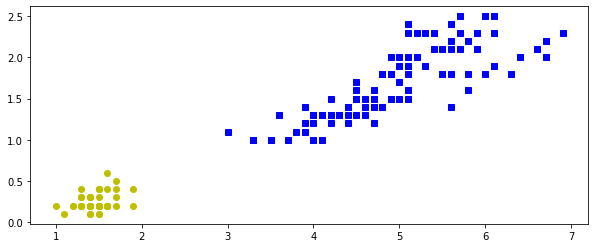

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

In [5]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.4.1'

In [6]:
keras.__version__

'2.4.0'

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

In [14]:
# build neural network with 2 hidden layers
model = keras.models.Sequential() # Sequential Model (simplest of Keras model)
# can also set keras.layers.InputLayer
model.add(keras.layers.Flatten(input_shape=[28,28])) # first layer: convert img into 1D array
# Dense hidden layer w/ 300 neurs. Use ReLU activation function
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
# first layer has 784 x 300 connection weights + 300 bias terms (235500)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [18]:
model.layers

In [19]:
hidden1 = model.layers[1]

In [20]:
hidden1.name

'dense_3'

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights

array([[ 0.04397329, -0.06812803, -0.0478894 , ..., -0.02158372,
        -0.01766781,  0.05163574],
       [-0.01363129,  0.06314814, -0.07060111, ...,  0.05101682,
         0.01779459, -0.06981543],
       [ 0.02793192,  0.06905329, -0.06873429, ..., -0.01143123,
         0.02088027,  0.06260115],
       ...,
       [ 0.04255912, -0.00609726,  0.04447027, ...,  0.07313134,
         0.05920126, -0.04947519],
       [-0.0386113 ,  0.00110964, -0.0016088 , ...,  0.04646177,
        -0.06463844,  0.03684086],
       [ 0.05214237,  0.06484291,  0.07074487, ...,  0.02186721,
        -0.03185923,  0.02146353]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

In [26]:
# sparse_categorical_crossentropy - sparse labels (0-9 target class index)
# sgd - train using Stoichastic Gradient Descent
# thus Keras does backpropagation algorithm - reverse-model autodiff plus SGD
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [27]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 1.0136 - accuracy: 0.6765 - val_loss: 0.5031 - val_accuracy: 0.8398
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4997 - accuracy: 0.8270 - val_loss: 0.4488 - val_accuracy: 0.8486TA: 0s - loss: 0.5013 - accu
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4434 - accuracy: 0.8452 - val_loss: 0.4223 - val_accuracy: 0.8566
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4178 - accuracy: 0.8540 - val_loss: 0.4015 - val_accuracy: 0.8612
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3955 - accuracy: 0.8611 - val_loss: 0.3885 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3813 - accuracy: 0.8677 - val_loss: 0.3731 - val_accuracy: 0.8740
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3682 - accuracy: 0.8683 - val_

In [28]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [29]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


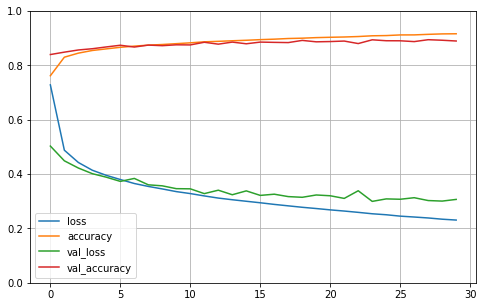

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 64.1989 - accuracy: 0.8431


[64.19890594482422, 0.8431000113487244]

In [32]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
# pred_classes (deprecated) or np argmax 
# to give highest estiamted probability

# y_pred = model.predict_classes(X_new)
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [35]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [36]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [46]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [47]:
np.random.seed(42)
tf.random.set_seed(42)

In [48]:

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.2656 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 996us/step - loss: 0.7413 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 963us/step - loss: 0.6604 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 937us/step - loss: 0.6245 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5770 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 975us/step - loss: 0.5609 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 884us/step - loss: 0.5500 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 937us/step - loss: 0.5200 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 945us/step - loss: 0.5051 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 915us/step - loss: 0.4910 - 

In [49]:
y_pred

array([[0.3885664],
       [1.6792021],
       [3.1022797]], dtype=float32)

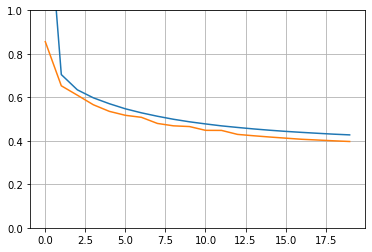

In [50]:
# plot test vs training data comparison
# they're about 1/2 epoch off in interval

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [53]:
# wide & deep neural network

# input object
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# concatenate input & output of second hidden layer
concat = keras.layers.Concatenate()([input_, hidden2])
# pass result of cancatenation
output = keras.layers.Dense(1)(concat)
# create Keras Model, specifying inputs and outputs
model = keras.Model(inputs=[input_], outputs=[output])

(11610, 8)


In [54]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 30)           930         dense_16[0][0]                   
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_17[0][0]             

In [55]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.0176 - val_loss: 9.0709
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.1319 - val_loss: 0.7934
Epoch 3/20
363/363 [==============================] - 0s 914us/step - loss: 0.7526 - val_loss: 0.7917
Epoch 4/20
363/363 [==============================] - 0s 897us/step - loss: 0.6930 - val_loss: 0.6160
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6249 - val_loss: 0.5734
Epoch 6/20
363/363 [==============================] - 0s 982us/step - loss: 0.5900 - val_loss: 0.5743
Epoch 7/20
363/363 [==============================] - 0s 926us/step - loss: 0.5760 - val_loss: 0.5850
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5330 - val_loss: 0.5071
Epoch 9/20
363/363 [==============================] - 0s 973us/step - loss: 0.5169 - val_loss: 0.4890
Epoch 10/20
363/363 [==============================] - 0s 991us/step - loss: 0.4931 - val_

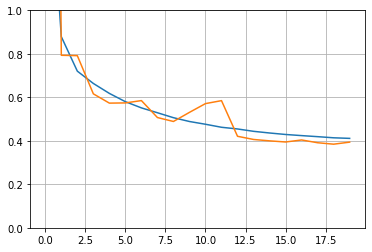

In [56]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [58]:
np.random.seed(42)
tf.random.set_seed(42)

In [59]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [60]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

# length 5 (A) & 6 (B)
# which matches shape in input A & B
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.1941 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7247 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6176 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5799 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5409 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5173 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5186 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4977 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4765 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4676 - val_loss: 0.4315

In [74]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [76]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))


In [77]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 4.0679 - main_output_loss: 3.9348 - aux_output_loss: 5.2661 - val_loss: 3.1302 - val_main_output_loss: 2.9690 - val_aux_output_loss: 4.5812
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2234 - main_output_loss: 0.9927 - aux_output_loss: 3.2997 - val_loss: 1.4616 - val_main_output_loss: 1.1332 - val_aux_output_loss: 4.4175
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9123 - main_output_loss: 0.7692 - aux_output_loss: 2.2001 - val_loss: 1.0709 - val_main_output_loss: 0.7464 - val_aux_output_loss: 3.9914
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7935 - main_output_loss: 0.6889 - aux_output_loss: 1.7348 - val_loss: 0.9311 - val_main_output_loss: 0.6336 - val_aux_output_loss: 3.6091
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7326 - main_output_loss: 0.6391 - aux_output_loss: 1.5745 - val_loss

In [78]:
total_loss, main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.4664 - main_output_loss: 0.4219 - aux_output_loss: 0.8667


In [79]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [80]:
y_pred_main

array([[0.57164013],
       [1.904992  ],
       [3.165255  ]], dtype=float32)

In [85]:
# subclass api to build model
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

In [86]:
# save & load a trained model
# model.save("my_keras_model.h5")
# model = keras.models.load_model("my_keras_model.h5")

In [87]:
# callbacks to save at reguar intervals
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
# history = model.fit(X_train, y_train, epochs=10, callbacks=
# [checkpoint_cb])

In [93]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [94]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [95]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
# rollback to best model
model = keras.models.load_model("my_keras_model.h5") 
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 924us/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 607us/step - loss: 0.4382


In [96]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4578 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4430 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4376 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4361 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4204 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4112 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4226 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4135 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 961us/step - loss: 0.4039 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 0s 914us/step - loss: 0.4023 - va

363/363 [==============================] - 0s 1ms/step - loss: 0.3297 - val_loss: 0.3274
Epoch 82/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3441 - val_loss: 0.3167
Epoch 83/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3369 - val_loss: 0.3280
Epoch 84/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3182 - val_loss: 0.3634
Epoch 85/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3235 - val_loss: 0.3176
Epoch 86/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3184 - val_loss: 0.3156
Epoch 87/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3395 - val_loss: 0.3529
Epoch 88/100
363/363 [==============================] - 0s 913us/step - loss: 0.3264 - val_loss: 0.3258
Epoch 89/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3210 - val_loss: 0.3630
Epoch 90/100
363/363 [==============================] - ETA: 0s - loss: 0.317 - 0s 1ms/step -

In [88]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [89]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [90]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [91]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))


In [97]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3302 - val_loss: 0.3556
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3301 - val_loss: 0.3304
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3296 - val_loss: 0.3347
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3295 - val_loss: 0.3141
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3291 - val_loss: 0.3367
Epoch 6/30
363/363 [==============================] - 0s 944us/step - loss: 0.3288 - val_loss: 0.3179
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3283 - val_loss: 0.3188
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3281 - val_loss: 0.3180
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3278 - val_loss: 0.3365
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3274 - val_loss: 0.32

In [ ]:
# Run: tensorboard --logdir=./my_logs --port=6006

In [98]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2021_03_24-21_56_22'

In [99]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [100]:
# model with diff learning rate
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [101]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 0.7645 - val_loss: 302.8536
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 8159520618.2209 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3439 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3546 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3513 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3274 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3639 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3487 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3445 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3697 - val_l